In [2]:
import numpy as np
import openjij as oj

In [3]:
import openjij as oj

# 問題を表す縦磁場と相互作用を作ります。OpenJijでは辞書型で問題を受け付けます。
N = 5
h = {i: -1 for i in range(N)}
J = {(i, j): -1 for i in range(N) for j in range(i+1, N)}

print('h_i: ', h)
print('Jij: ', J)

h_i:  {0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
Jij:  {(0, 1): -1, (0, 2): -1, (0, 3): -1, (0, 4): -1, (1, 2): -1, (1, 3): -1, (1, 4): -1, (2, 3): -1, (2, 4): -1, (3, 4): -1}


In [9]:
np.array(J)

array({(0, 1): -1, (0, 2): -1, (0, 3): -1, (0, 4): -1, (1, 2): -1, (1, 3): -1, (1, 4): -1, (2, 3): -1, (2, 4): -1, (3, 4): -1},
      dtype=object)

In [6]:
# まず問題を解いてくれるSamplerのインスタンスを作ります。
# このインスタンスの選択で問題を解くアルゴリズムを選択できます。
sampler = oj.SASampler(num_reads=5)
# samplerのメソッドに問題(h, J)を投げて問題を解きます。
response = sampler.sample_ising(h, J)

# 計算した結果(状態)は response.states に入っています。
print(response.states)

# もしくは添字付きでみるには samples関数 を用います。
print([s for s in response.samples()])

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[{0: 1, 1: 1, 2: 1, 3: 1, 4: 1}, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}]


In [10]:
import numpy as np
mat = np.array([[-1,-0.5,-0.5,-0.5],[-0.5,-1,-0.5,-0.5],[-0.5,-0.5,-1,-0.5],[-0.5,-0.5,-0.5,-1]])
print(mat)

# oj.BinaryQuadraticModelを作成し、変数タイプ (vartype)を'SPIN'にします。
bqm = oj.BinaryQuadraticModel.from_numpy_matrix(mat, vartype='SPIN')
# 各要素をprintで確認できます。J_{ij}とJ_{ji}は内部でまとめられます。
print(bqm)

sampler = oj.SASampler(num_reads=3)
response = sampler.sample(bqm)

print(response.states)

[[-1.  -0.5 -0.5 -0.5]
 [-0.5 -1.  -0.5 -0.5]
 [-0.5 -0.5 -1.  -0.5]
 [-0.5 -0.5 -0.5 -1. ]]
BinaryQuadraticModel({0: -1.0, 1: -1.0, 2: -1.0, 3: -1.0}, {(0, 1): -1.0, (1, 3): -1.0, (0, 2): -1.0, (1, 2): -1.0, (0, 3): -1.0, (2, 3): -1.0}, 0.0, Vartype.SPIN, sparse=False)
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [14]:
X = np.random.normal(size = (4, 5))
mat = X @ X.T

In [18]:
print(mat)

# oj.BinaryQuadraticModelを作成し、変数タイプ (vartype)を'SPIN'にします。
bqm = oj.BinaryQuadraticModel.from_numpy_matrix(mat, vartype='SPIN')
# 各要素をprintで確認できます。J_{ij}とJ_{ji}は内部でまとめられます。
print(bqm)

sampler = oj.SASampler(num_reads=5)
response = sampler.sample(bqm)

print(response.states)

[[8.05923744 1.39197506 1.83957535 2.09764547]
 [1.39197506 3.62668137 0.50621007 0.17218037]
 [1.83957535 0.50621007 3.81696219 0.56552776]
 [2.09764547 0.17218037 0.56552776 1.87703911]]
BinaryQuadraticModel({0: 8.059237436607052, 1: 3.6266813705907275, 2: 3.81696218791518, 3: 1.8770391061944744}, {(0, 1): 2.783950122755484, (1, 3): 0.3443607353003958, (0, 2): 3.6791506957266122, (1, 2): 1.0124201488520135, (0, 3): 4.195290937908955, (2, 3): 1.1310555147120729}, 0.0, Vartype.SPIN, sparse=False)
[[-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


In [20]:
# Q_ij を辞書型でつくります。
Q = {(0, 0): -1, (0, 1): -1, (1, 2): 1, (2, 2): 1}
sampler = oj.SASampler()
# QUBOを解く時は .sample_qubo を使います。
response = sampler.sample_qubo(Q)
print(response.states)

[[1 1 0]]


In [29]:
N = 50
# ランダムにQij を作る
import random
Q = {(i, j): random.uniform(-1, 1) for i in range(N) for j in range(i+1, N)}

In [30]:
# OpenJijで解く
sampler = oj.SASampler()
response = sampler.sample_qubo(Q, num_reads=100)

In [31]:
# エネルギーを少しみてみます。
response.energies[:5]

array([-56.02455207, -56.8961425 , -56.8961425 , -56.04908916,
       -56.02455207])

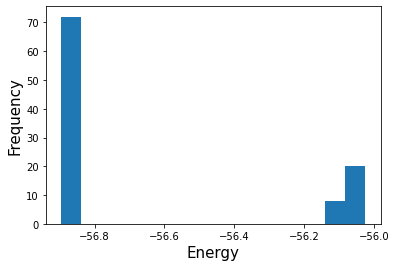

In [32]:
import matplotlib.pyplot as plt
plt.hist(response.energies, bins=15)
plt.xlabel('Energy', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()